# Introduction

**Accordint to the article "Emissions by sector" by Our Worls in Data(https://ourworldindata.org/emissions-by-sector),**

Emissions come from many sectors: we need many solutions to decarbonize the economy

It is clear from this breakdown that a range of sectors and processes contribute to global emissions. This means there is no single or simple solution to tackle climate change. Focusing on electricity, or transport, or food, or deforestation alone is insufficient.

Even within the energy sector – which accounts for almost three-quarters of emissions – there is no simple fix. Even if we could fully decarbonize our electricity supply, we would also need to electrify all of our heating and road transport. And we’d still have emissions from shipping and aviation –  which we do not yet have low-carbon technologies for – to deal with.

To reach net-zero emissions we need innovations across many sectors. Single solutions will not get us there.

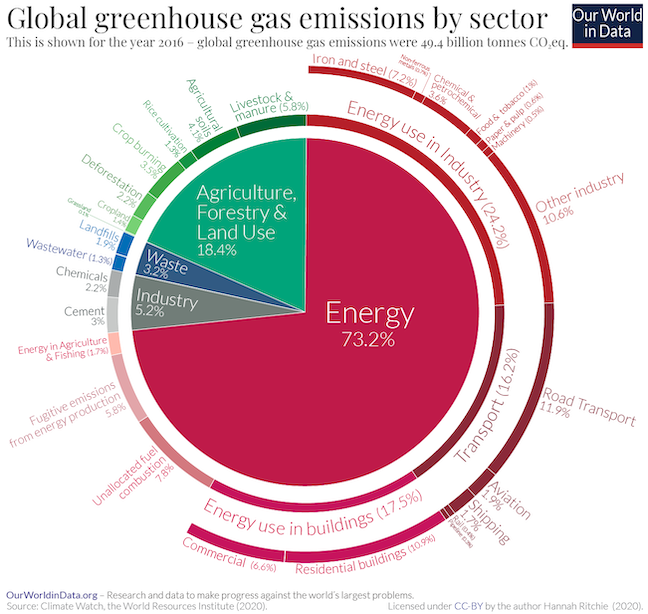

**In this notebook, I tried to find the CO2 emission gap among countries, and also tried to divide into some clusters.**

# Importing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/kaggle/input/agri-food-co2-emission-dataset-forecasting-ml/Agrofood_co2_emission.csv')

# Data Outline

**1) Data Frame**

In [ ]:
df.head()

**2) Features Description**

* Savanna fires: Emissions from fires in savanna ecosystems.
* Forest fires: Emissions from fires in forested areas.
* Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
* Rice Cultivation: Emissions from methane released during rice cultivation.
* Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
* Pesticides Manufacturing: Emissions from the production of pesticides.
* Food Transport: Emissions from transporting food products.
* Forestland: Land covered by forests.
* Net Forest conversion: Change in forest area due to deforestation and afforestation.
* Food Household Consumption: Emissions from food consumption at the household level.
* Food Retail: Emissions from the operation of retail establishments selling food.
* On-farm Electricity Use: Electricity consumption on farms.
* Food Packaging: Emissions from the production and disposal of food packaging materials.
* Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
* Food Processing: Emissions from processing food products.
* Fertilizers Manufacturing: Emissions from the production of fertilizers.
* IPPU: Emissions from industrial processes and product use.
* Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
* Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
* Manure Management: Emissions from managing and treating animal manure.
* Fires in organic soils: Emissions from fires in organic soils.
* Fires in humid tropical forests: Emissions from fires in humid tropical forests.
* On-farm energy use: Energy consumption on farms.
* Rural population: Number of people living in rural areas.
* Urban population: Number of people living in urban areas.
* Total Population - Male: Total number of male individuals in the population.
* Total Population - Female: Total number of female individuals in the population.
* total_emission: Total greenhouse gas emissions from various sources.
* Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius,

**3) Data Information**

In [ ]:
df.info()

**4) Data Description**

In [ ]:
df.describe().T

# Visualization

**1) Pairplot**

In [ ]:
sns.pairplot(df.sample(n=1000, random_state=41))

**2) Correlation heatmap**

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt="1.1f")

**3) Total emission by years**

In [ ]:
df.groupby('Year')['total_emission'].sum().plot();

**4) Total emission violinplot by years**

In [ ]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')

x1=df[df['Year']==1990]['total_emission']
x2=df[df['Year']==2000]['total_emission']
x3=df[df['Year']==2010]['total_emission']
x4=df[df['Year']==2020]['total_emission']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.violinplot([x1, x2, x3, x4])
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['1990', '2000', '2010', '2020'])
ax.set_xlabel('Year')
ax.set_ylabel('Total Emission')

plt.show()

**5) 20 countries by most total emission**

In [ ]:
df.groupby('Area')['total_emission'].sum().sort_values(ascending=False).head(20).plot.bar();

**6) 20 countries by less total emission**

In [ ]:
df.groupby('Area')['total_emission'].sum().sort_values(ascending=True).head(20).plot.bar();

**7) Russia and China - Total emission by years**

In [ ]:
sns.lineplot(data=df[(df['Area']=='Russian Federation')|(df['Area']=='China')],x='Year',y='total_emission',hue='Area');

**Why is the total_emission of Russia is so low?**

**We may get some tips from the article "The carbon footprint of crop production in Russia" by The Food and Land Use Coalition (https://www.foodandlandusecoalition.org/the-carbon-footprint-of-crop-production-in-russia/)**

Pathways to sustainable food and land use in Russia
 
1. Avoid cropland expansion
Converting grassland or any type of natural land to cropland generates high levels of GHG emissions. For example, in Russia cultivating already established cropland generates 1-2 CO2 tons of emissions per hectare, compared to 12-34 tons of CO2 per hectare when natural ecosystems are turned into new cropland. Thus, from a sustainable point of view it’s possible to cultivate less land with high yields, rather than more land with low yields and high land use change emissions.

2. Manage fragile peatland
In Northwestern Russia, GHG emissions are still high per ton of production, partly due to the cultivation of fragile peatlands with high quantities of organic content. A more sustainable option could be switching to perennial crops (like clover or vetch), which generate less GHG emissions.
Local interests and practices are highly cultural and must be considered. Therefore, more research is needed in this area.

3. Reduce agricultural inputs in highly productive regions
Southwestern regions have already achieved a low carbon path, but they still need to assess the use of other inputs such as fertilizers and pesticides. Often, in regions with high yields, the overuse of inputs can cause additional harm to local soils, rivers and communities. To address this, data collection in Russia at the municipal and local level needs to be further enhanced.  

**8)  Russia and China - Average Temperature by years**

In [ ]:
sns.lineplot(data=df[(df['Area']=='Russian Federation')|(df['Area']=='China')],x='Year',y='Average Temperature °C',hue='Area');

**Total emission of Russia is very lower than China. But the  increase of Average Temperature of Russia is higher than that of China.**

**9) Countries whose total emission in 2019 is minus**

In [ ]:
df_2019=df[df['Year']==2019]

In [ ]:
plt.figure(figsize=(20,12))
plt.axvline(x=0,color='red',lw=1,ls='--',alpha=1)
plt.axhline(y=df_2019['Average Temperature °C'].median(),color='red',lw=1,ls='--',alpha=1)
sns.scatterplot(data=df_2019,x='total_emission',y='Average Temperature °C');

**In 2019, there are some countries which have below 0 'total emission' and  above median 'Average Temperature °C'.**

In [ ]:
plt.axvline(x=0,color='red',lw=1,ls='--',alpha=1)
plt.axhline(y=df_2019['Average Temperature °C'].median(),color='red',lw=1,ls='--',alpha=1)
sns.scatterplot(data=df_2019[df_2019['total_emission']<=0],x='total_emission',y='Average Temperature °C');

In [ ]:
df_2019[df_2019['total_emission']<=0].loc[:,['Area','total_emission','Average Temperature °C']]

**For example, according to the data from  Our World in Data, Bulgaria has negative land-use change and forestry (-33.8 million ton) in 2019. It contributes to the minus total emission.**

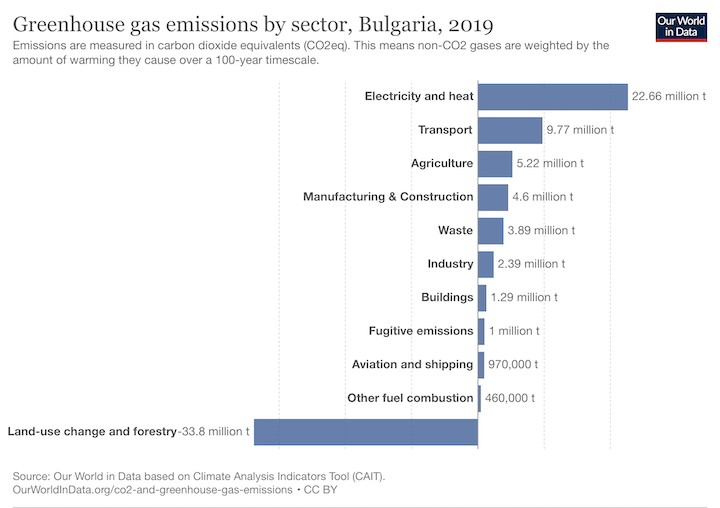

**So as a next step, I will look into the "Land-use change and forestry".**

**Acccordint to the article "What Is Land Use, Land Use Change, and Forestry? Is Land Use Change Bad?" by FFAC Staff (https://ffacoalition.org/articles/land-use-change/),**

“Land use, land use change, and forestry” (LULUCF), also known as “forestry and other land use” (FOLU), is a collective term used in international climate policy. In national greenhouse gas (GHG) inventories, LULUCF is a sector that includes the emissions released and captured by managed areas of land. “Land use,” “land use change,” and “forestry” also each have their own meanings. 

* Land Use

“Land use” describes the human purposes for which an area of land is managed, such as for agricultural, industrial, recreational, or residential activities. Land use is separate from “land cover,” which describes the physical type of land rather than what it is used for. When reporting on national GHG emissions, countries sort land use into the following categories: forest land, cropland, grassland, wetlands, settlements, and other lands. 

Land accounts for 29 percent of Earth’s surface area (71 percent is water), and a total of 29 percent of Earth’s land is either covered by permanent snow and ice or is barren. The remaining 71 percent of the world’s land is the surface area that can physically be used by humans.   

Agriculture is the world’s single biggest use of land, stretching across 50 percent of the planet’s habitable surface. Meat and dairy products are, by nature, much more land-intensive to produce than plant-based foods. Thanks to the relative inefficiency of farming animals for food, animal agriculture takes up 83 percent of global farmland but only produces 18 percent of calories and 37 percent of protein. 

* Land Use Change

Land use change  refers to the conversion of an area of land's use by humans from one state to another.  Land may be converted from grassland to cropland, or from wilderness to land to graze cattle.

* Forestry

Forestry is the use and management of trees and other forest resources for human benefit. Worldwide, around 1.15 billion hectares of forest are used by humans, mainly for the production of wood and other forest commodities. A further 749 million hectares are managed for multiple other purposes. In the United States, livestock grazing is permitted on over 102 million acres of 193 million acres within the National Forest System lands spread across 29 states.

# Clustering and PCA

**1) Focus on 2020 data**

In [ ]:
df_2020=df[df['Year']==2020]

**2) Drop features which include MaN**

In [ ]:
df_2020=df_2020.dropna(axis=1)

In [ ]:
df_2020.info()

In [ ]:
df_2020=df_2020.reset_index(drop=True)
df_2020.head()

In [ ]:
df_clus=df_2020.drop(['Area','Year'],axis=1)
df_clus.head()

**3) Standardizing**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df_clus)
df_sc = pd.DataFrame(df_sc, columns=df_clus.columns)

**4) Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_sc)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_sc)

In [ ]:
cluster = model.labels_

In [ ]:
df_clus['Country']=df_2020['Area']

In [ ]:
df_clus['Cluster']=cluster

In [ ]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
df_clus.groupby('Cluster')['Country'].count().plot.bar()
plt.title('Barplot by Cluster',fontsize=8)

plt.subplot(1, 2, 2)
df_clus.groupby('Cluster')['Country'].count().plot.pie(autopct="%1.1f%%")
plt.title('Pieplot by Cluster',fontsize=6);

In [ ]:
df_clus.groupby('Cluster').mean().style.bar(axis=0)

In [ ]:
df_2020.columns

In [ ]:
clus_col=['Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'Manure left on Pasture',
       'Fires in organic soils', 'Rural population', 'Urban population',
       'Total Population - Male', 'Total Population - Female',
       'total_emission', 'Average Temperature °C']

In [ ]:
fig = plt.figure(figsize=(20,20))

for i in range(len(clus_col)):
    plt.subplot(8,4,i+1)
    sns.boxplot(df_clus,y=df_clus[clus_col[i]],x=df_clus['Cluster'])
    plt.title(clus_col[i],fontsize=5)
    
plt.tight_layout()
plt.show()

In [ ]:
clus_col2=['Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'Manure left on Pasture',
       'Fires in organic soils', 'Rural population', 'Urban population',
       'Total Population - Male', 'Total Population - Female',
       'Average Temperature °C']

In [ ]:
fig = plt.figure(figsize=(20,20))

for i in range(len(clus_col2)):
    plt.subplot(8,4,i+1)
    sns.scatterplot(df_clus,x=df_clus[clus_col2[i]],y=df_clus['total_emission'],hue=df_clus['Cluster'],palette="Pastel1")
    plt.title(clus_col2[i],fontsize=5)
    
plt.tight_layout()
plt.show()

**5) PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(df_sc)
feature = pca.transform(df_sc)

In [ ]:
df_clus['PCA1']=feature[:,0]
df_clus['PCA2']=feature[:,1]

In [ ]:
df_clus.groupby('Cluster')['PCA1','PCA2'].mean().T.style.bar(axis=1)

In [ ]:
pd.DataFrame(pca.components_,columns=df_sc.columns,index=['PCA1','PCA2']).T

In [ ]:
fig=plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

scatter=ax.scatter(df_clus['PCA1'], df_clus['PCA2'],alpha=0.8, c=cluster)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster0','Cluster1','Cluster2','Cluster3'],
           title="Cluster",loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
df_clus[(df_clus['Cluster']==1)|(df_clus['Cluster']==2)|(df_clus['Cluster']==3)].loc[:,['Country','Cluster','PCA1','PCA2']]

**We can find some gap and difference among countries, especially population have impact. So I also sorted data by total population.**

In [ ]:
df_clus['Total_population']=df_clus['Total Population - Male']+ df_clus['Total Population - Female']
df_clus['UrbanPop_ratio']=df_clus['Urban population']/df_clus['Total_population']

In [ ]:
df_clus.sort_values('Total_population', ascending=False).head(10).loc[:,['Country','Cluster','Total_population','UrbanPop_ratio']]

**China, India, the USA, Indonesia and Brazil are in Cluster1, Cluster2 or Cluster3.**

**And the specific features of Indonesia (= Cluster3) are**
* High Drained organic soils (CO2)
* High Fires in organic soils

**What cause High Drained organic soils (CO2) and High Fires in organic soils in Indonesia?**

**Accoding to the articlee "Drained organic soils 1990–2019" by FAO (https://www.fao.org/3/cb0489en/cb0489en.pdf),**

In 2019, Indonesia had the world largest annual emissions from drained organic soils, totaling 343 Mt CO2eq (41 percent of the world total). These emissions are from about 5 Mha of drained tropical peatlands, largely for oil palm cultivation. Substantial contributions were estimated for Malaysia (48 Mt CO2eq), the United States of America (47 Mt CO2eq), Russian Federation (35 Mt CO2eq) and Belarus (27 Mt CO2eq).

Indonesia also had largest absolute increase in emissions from drained organic soils during the 1990–2019 period, corresponding to 273 Mt CO2eq (26 percent relative increase). Malaysia had a smaller yet still significant increase over the same period, of 31 Mt CO2eq, representing the highest relative increase among large emitters (54 percent). Figure 5 illustrates the increase over time in the area of drained organic soils in both countries.

**And accordint to the data from CarbonBrief "The Carbon Brief Profile: Indonesia" by DAISY DUNNE(https://www.carbonbrief.org/the-carbon-brief-profile-indonesia/),**

Indonesia faced severe fires in 2006 which caused land-use emission spike.

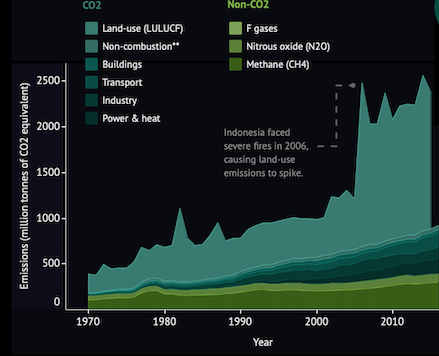

**Thank you for reading!**

reference:
* "Emissions by sector" by Our Worls in Data(https://ourworldindata.org/emissions-by-sector)
*  "The carbon footprint of crop production in Russia" by The Food and Land Use Coalition (https://www.foodandlandusecoalition.org/the-carbon-footprint-of-crop-production-in-russia/)
*  "What Is Land Use, Land Use Change, and Forestry? Is Land Use Change Bad?" by FFAC Staff (https://ffacoalition.org/articles/land-use-change/)
* "Drained organic soils 1990–2019" by FAO (https://www.fao.org/3/cb0489en/cb0489en.pdf)
* "The Carbon Brief Profile: Indonesia" by DAISY DUNNE(https://www.carbonbrief.org/the-carbon-brief-profile-indonesia/)